In [1]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import pandasql as ps
from wordcloud import WordCloud

import re
import regex
import datetime as date
from datetime import datetime
from collections import Counter

import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

from pandas import ExcelWriter
from pandas import ExcelFile

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [2]:
excel_filename = "HospitalDatabase.xlsx"
df_Patients=pd.read_excel(excel_filename, "Patients")
df_EDVisits = pd.read_excel(excel_filename, "EDVisits")
df_AmbulatoryVisits = pd.read_excel(excel_filename, "AmbulatoryVisits")
df_ReAdmissionRegistry = pd.read_excel(excel_filename, "ReAdmissionRegistry")
df_Discharges = pd.read_excel(excel_filename, "Discharges")
df_Providers = pd.read_excel(excel_filename, "Providers")
df_EDUnique = pd.read_excel(excel_filename, "EDUnique")

## 1 calculate years of experience of each provider

In [204]:
ProvidersCopy= df_Providers.copy()
ProvidersCopy['JoinYear'] = ProvidersCopy['ProviderDateOnStaff'].dt.year
currentyear = datetime.now().year
ProvidersCopy['Experience'] = currentyear - ProvidersCopy['JoinYear']
ProvidersCopy

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,JoinYear,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,1993,30
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,1993,30
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,1993,30
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,1993,30
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,1995,28
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,1995,28
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,1995,28
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,1996,27
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,1997,26
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,1998,25


## 2 Count of visits per month

In [236]:
df_AmbulatoryVisits['VisitMonth'] = df_AmbulatoryVisits['DateofVisit'].dt.month_name()
df_AmbulatoryVisits['VisitCount']=0
df=pd.pivot_table(df_AmbulatoryVisits,index=['VisitMonth','VisitType'],values='VisitCount',aggfunc='count',margins=True)
df

VisitCount
VisitMonth VisitType               
April      Follow Up             81
           New                   57
           Physical              24
           Telemedicine          58
February   Follow Up             90
           New                    5
           Physical              50
           Telemedicine          93
January    Follow Up             30
           New                   39
           Physical              19
           Telemedicine          23
March      Follow Up            123
           New                   16
           Physical             109
           Telemedicine         105
May        Follow Up             12
           New                    8
           Physical               3
           Telemedicine           5
All                             950


## 3 Calculate average years of experience by providerspecialty

In [190]:
df=pd.pivot_table(ProvidersCopy,index=['ProviderSpecialty'],values='Experience',aggfunc='mean',margins=True)
df

,Experience
ProviderSpecialty,
Cardiology,19.125000
Pediatrics,28.555556
PrimaryCare,13.437500
Surgery,24.142857
All,19.850000


## 4 Bar Chart for Patients Gender Distribution based on Race

In [11]:
df_PatientCopy= df_Patients.copy()
df_PatientCopy['BirthYear'] = df_PatientCopy['DateOfBirth'].dt.year
currentyear = datetime.now().year
df_PatientCopy['Age'] = currentyear - df_PatientCopy['BirthYear']
df_PatientCopy

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,BirthYear,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,38
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,47
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,55
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,61
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,37
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,53
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,60


In [12]:
query = "SELECT Race,Gender,Count(*) as PatientCount from df_PatientCopy group by Race, Gender"
df=ps.sqldf(query,locals()).sort_values(by='PatientCount', ascending = False)
df

,Race,Gender,PatientCount
1,Black/African-American,Male,336
2,White,Female,271
3,White,Male,201
0,Black/African-American,Female,137


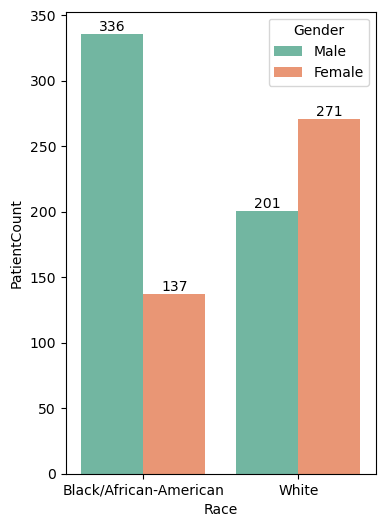

In [13]:
plt.figure(figsize=(4,6))
ax=sns.barplot(data=df, x="Race", y="PatientCount", hue="Gender",palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

## 5 Wordcloud for ReasonforVisit

(-0.5, 699.5, 299.5, -0.5)

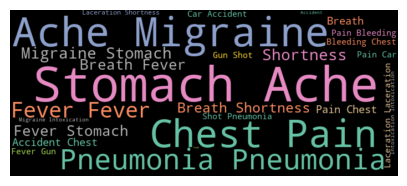

In [168]:
from wordcloud import WordCloud

list1 = df_EDVisits['ReasonForVisit'].to_string(index=False)
wordcloud = WordCloud(width=700 , height=300,background_color="black",colormap="Set2").generate(list1)
plt.figure(figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 6 Wordcloud for the functios used in this hackathon


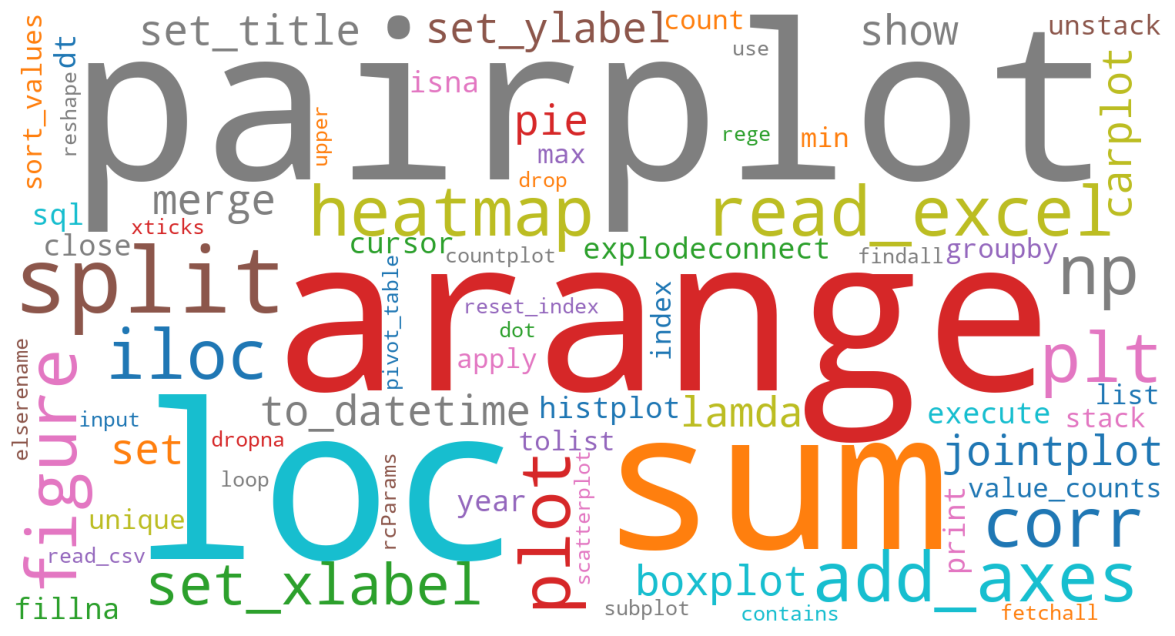

In [5]:
 my_list=["read_excel()","pairplot()","heatmap()","corr()","iloc[]","np.arange()","plt.figure()",
          "add_axes()","plot()","set_xlabel()","set_ylabel()","set_title()","to_datetime()","boxplot()","jointplot()",
          "pairplot()","set()","carplot()","merge()","loc[lamda ]","loc()","pie()","show()","explodeconnect()","sql()",
          "execute()","cursor()","print()","close()","isna()","sum()","fillna()","histplot()","dt.year","value_counts()",
          "index()","groupby()","list()","tolist()","stack()","unstack()","count()","max()","sum()","sort_values()","min()",
          "apply()","unique()","reset_index()","split()","countplot()","subplot()","xticks()","for loop","upper()","read_csv",
          "findall()","scatterplot()","fetchall()","rege.split()","arange()","reshape()","dot()","if else"
          "rename()","pivot_table()","contains()","use()","rcParams[]","drop()","input()","dropna()"]
strings=(" ").join(my_list)
wordcloud = WordCloud(width = 1500, height = 800,background_color="white",colormap="tab10").generate(strings)
wordcloud.to_file('wc.png')
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()








## 7 New Patients Per Month 

In [8]:
df_AmbulatoryVisits['VisitMonth'] = df_AmbulatoryVisits['DateofVisit'].dt.month_name()
df=df_AmbulatoryVisits.groupby('VisitMonth')['VisitType'].apply(lambda x: (x=='New').sum()).reset_index(name='NewPatients')
df=Sort_Dataframeby_Month(df=df,monthcolumnname='VisitMonth')
df

,VisitMonth,NewPatients
0,January,39
1,February,5
2,March,16
3,April,57
4,May,8


<AxesSubplot:xlabel='VisitMonth', ylabel='NewPatients'>

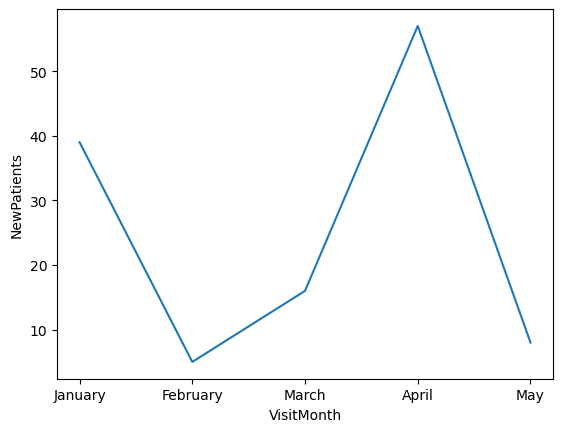

In [11]:
sns.lineplot(x='VisitMonth',y='NewPatients',data=df)

In [6]:
## 8 Distribution of Patients by Language
df=df_Patients.groupby('Language')['PatientID'].count()
df

Language
English    827
Spanish    110
Name: PatientID, dtype: int64

In [3]:
## 9 Monthly Deaths
df_Discharges['DischargeMonth'] = df_Discharges['DischargeDate'].dt.month_name()
df=df_Discharges.groupby('DischargeMonth')['DischargeDisposition'].apply(lambda x: (x=='Expired').sum()).reset_index(name='DeathCount')
Sort_Dataframeby_Month(df=df,monthcolumnname='DischargeMonth')


,DischargeMonth,DeathCount
0,January,38
1,February,59
2,March,7


In [4]:
## 10 How many Patients handled by each Provider
df=pd.read_excel('HospitalDatabase.xlsx', 'AmbulatoryVisits')
datapd=pd.pivot_table(data=df, index='ProviderID', values='PatientMRN', aggfunc='count').sort_values(by= "PatientMRN", ascending=False).rename(columns={"PatientMRN": "PatientCount"})
datapd

,PatientCount
ProviderID,
1,38
7,31
10,30
13,29
3,28
6,28
4,27
5,27
8,27


In [5]:
##11 unique patients in ambulatory visits
df = df_AmbulatoryVisits['PatientMRN'].nunique()
df

273